In [3]:
import networkx as nx
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite
import scipy.sparse as sparse
import freeman as fm



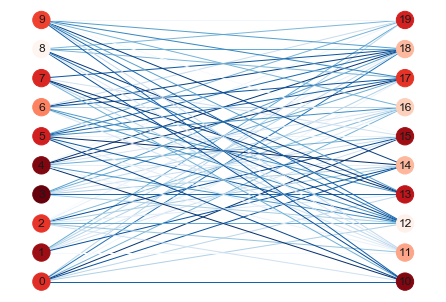

In [4]:
## Exemplo de Two-Mode 

a_matrix = sparse.rand(10, 10, format='coo', density=0.8)

G = bipartite.from_biadjacency_matrix(a_matrix, create_using=None, 
                                         edge_attribute='weight')
X, Y = bipartite.sets(G)
pos = dict()
pos.update((n, (0, i*10)) for i, n in enumerate(X))
pos.update((n, (0.5, i*10)) for i, n in enumerate(Y))
num_edges = G.number_of_edges()
num_nodes = G.number_of_nodes()
nx.draw(G, pos=pos, with_labels=True,
        edge_color=np.random.random(num_edges), 
        edge_cmap=plt.get_cmap('Blues'), 
        node_color=np.random.random(num_nodes),
        cmap=plt.get_cmap('Reds'))

In [5]:
allGenres = []
allMovies = []
df = pd.read_csv("dataim.tsv" , sep='\t')
print(len(df.columns))
df.genres = df.genres.astype(str)
counter = 0
for i in df.index:
	if (counter < 20):
		movie = df.iloc[i]
		genreList = movie["genres"].split(",")
		for e in genreList:
			if e not in allGenres:
				allGenres.append(e)
		if "Comedy" in genreList:
			print(movie["originalTitle"])
			allMovies.append({"movie":movie["originalTitle"],"genres":genreList})
			counter+=1
print(allGenres)
print(allMovies)

FileNotFoundError: [Errno 2] File b'dataim.tsv' does not exist: b'dataim.tsv'

In [7]:
import pandas as pd 
dic = {}
listagene = []
df = pd.read_json(r"test.json")
df = df[df.box_office != "N/A"].dropna(subset=['box_office'])
df["box_office"] = df["box_office"].replace(',', '', regex=True).str[1:].astype({"box_office": int})
df = df.sort_values(by=['box_office'], ascending = False)


for i, j in zip(df["actors"], df["genre"]):
    listator = i.split(', ')
    listagen = j.split(', ')
    for a in listator:
        if a not in dic:
            dic[a] = {}
        for g in listagen:
            if g not in dic[a]:
                dic[a][g] = 1
            else:
                dic[a][g] += 1
            if g not in listagene:
                listagene.append(g)

listagene  
                    

['Action',
 'Adventure',
 'Sci-Fi',
 'Drama',
 'Fantasy',
 'Animation',
 'Comedy',
 'Family',
 'Mystery',
 'Thriller',
 'Crime',
 'Romance',
 'War',
 'Musical',
 'Horror',
 'Biography',
 'Western',
 'Music']

In [12]:
Actor_names = []
# for i in allMovies:
#     Movies_names.append(i["movie"])
for k in dic:
    Actor_names.append(k)


B = fm.Graph(nx.empty_graph())

B.add_nodes_from(Actor_names,bipartite = 0)
B.add_nodes_from(listagene,bipartite = 1)
B.set_all_nodes('size', 1)
B.set_all_nodes('labpos', 'hover')
B.label_nodes()
# for i in allMovies:
#     for e in i["genres"]:
#         B.add_edge(i["movie"],e,color=(255,0,255),weight=6)
        
# for k in dic:
#     for e in dic[k]:
#         print(e)
#         B.add_edge(i["movie"],e,color=(255,0,255),weight=6)
        
for name in Actor_names:
    for gen in dic[name]:
        B.add_edge(name,gen,color=(0,255,0),weight=dic[name][gen])
num_edges = B.number_of_edges()
num_nodes = B.number_of_nodes()

## Referencia do codigo abaixo do exercicio 3 das aulas. Por algum motivo o bipartite nao funcionou
B.move('bipartite', [n for n in B.nodes if B.nodes[n]['bipartite'] == 0])
        

In [13]:
B.draw()

In [60]:
B.corplot_twomode([n for n in B.nodes if B.nodes[n]['bipartite'] == 0])

AttributeError: 'Graph' object has no attribute 'corplot_twomode'